# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)



- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

**Solution**

Kronecker product:

$
A \bigotimes B = \begin{pmatrix}
a_{11}B & \dots & a_{1n}B\\
a_{21}B & \dots & a_{2n}B\\
\vdots & \ddots & \vdots \\ 
a_{m1}B & \dots & a_{mn}B
\end{pmatrix}
$

With a given statement in the problem we assume that we have such matrices with shapes.

$A = \begin{pmatrix}
a_{11} & \dots & a_{1n}\\
a_{21} & \dots & a_{2n}\\
\vdots & \ddots & \vdots \\ 
a_{m1} & \dots & a_{mn}
\end{pmatrix}_{m \times n} \quad 
B = \begin{pmatrix}
b_{11} & \dots & b_{1q}\\
b_{21} & \dots & b_{2q}\\
\vdots & \ddots & \vdots \\ 
b_{p1} & \dots & b_{pq}
\end{pmatrix}_{p \times q} \quad
X = \begin{pmatrix}
x_{11} & \dots & x_{1p}\\
x_{21} & \dots & x_{2p}\\
\vdots & \ddots & \vdots \\ 
x_{n1} & \dots & x_{np}
\end{pmatrix}_{n \times p}$

Let $M$ be $AXB$


We are going to take into consideration $w^{th}$ column of $M=AXB$.

$M_{w} = (AXB)_{w} = ((AX)B)_{w} = (AXB_{1}AXB_{2}...AXB_{q})_{w} = A \begin{pmatrix}
\sum_{i=1}^{p} x_{1i}b_{iw} \\
\sum_{i=1}^{p} x_{2i}b_{iw} \\
... \\
\sum_{i=1}^{p} x_{ni}b_{iw} \\
\end{pmatrix} = A \begin{pmatrix}
x_{11}b_{1w} + x_{12}b_{2w} + ... + x_{1p}b_{pw} \\
x_{21}b_{1w} + x_{22}b_{2w} + ... + x_{2p}b_{pw} \\
... \\
x_{n1}b_{1w} + x_{n2}b_{2w} + ... + x_{np}b_{pw} \\
\end{pmatrix} = A[ \begin{pmatrix}
    x_{11}\\
    x_{21}\\
    \vdots\\
    x_{n1}
  \end{pmatrix} b_{1w} +  \begin{pmatrix}
    x_{12}\\
    x_{22}\\
    \vdots\\
    x_{n2}
  \end{pmatrix}b_{2w} + \dots + \begin{pmatrix}
    x_{1p}\\
    x_{2p}\\
    \vdots\\
    x_{np}
  \end{pmatrix}b_{pw}] = b_{1w}A \begin{pmatrix}
    x_{11}\\
    x_{21}\\
    \vdots\\
    x_{n1}
  \end{pmatrix} +  b_{2w}A \begin{pmatrix}
    x_{12}\\
    x_{22}\\
    \vdots\\
    x_{n2}
  \end{pmatrix} + \dots + b_{pw}A\begin{pmatrix}
    x_{1p}\\
    x_{2p}\\
    \vdots\\
    x_{np}
  \end{pmatrix} = [ b_{1w}A, b_{2w}A, \dots, b_{pw}A] vec(X) = ([b_{1w}, b_{2w}, \dots, b_{pw}]\bigotimes A) vec(X) = (B_{w}^T \bigotimes A) vec(X)  \Rightarrow (AXB)_{w} = (B_{w}^T \bigotimes A) vec(X) $

Therefore, we obtain $ vec(AXB) = ((B_1^T \bigotimes A) vec(X), (B_2^T \bigotimes A) vec(X), \dots, (B_q^T \bigotimes A) vec(X)) = \begin{pmatrix}
    (B_1^T \bigotimes A)\\
    (B_2^T \bigotimes A)\\
    \vdots\\
    (B_q^T \bigotimes A)
  \end{pmatrix} vec(X) = (B^T \bigotimes A) vec(X) \Rightarrow vec(AXB) = (B^T \bigotimes A) vec(X)
$

$vec_{rowwise}(AXB) = vec((AXB)^T) = vec(B^T X^T A^T) = ((A^T)^T \bigotimes B^T) vec(X^T) = (A \bigotimes B^T) vec(X^T) = (A \bigotimes B^T) vec_{rowwise}(X) \Rightarrow vec_{rowwise}(AXB) = (A \bigotimes B^T) vec_{rowwise}(X)$

In [25]:
import numpy as np

m, n, p, q = 50, 40, 30, 50

A = np.random.randint(20, size=(m, n))
X = np.random.randint(30, size=(n, p))
B = np.random.randint(20, size=(p, q))

M = A@X@B
left_side = np.reshape(M, [m*q, 1], order='f')
print(left_side)

vec_x = np.reshape(X, [n*p, 1], order='f')

#Kronecker product of two arrays
right_side = np.kron(B.T, A) @ vec_x
print(right_side)

np.allclose(left_side, right_side)

[[1876484]
 [1574889]
 [1605712]
 ...
 [1535410]
 [1644692]
 [1657525]]
[[1876484]
 [1574889]
 [1605712]
 ...
 [1535410]
 [1644692]
 [1657525]]


True


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.


**Solution**

Let $A$ be a matrix with $(m \times n)$ shape. 

Let $B$ be a matrix with $(p \times q)$ shape. 

Let $X$ be a matrix with $(n \times p)$ shape. 

Assumimg such sizes of matrices $A$, $B$ and $X$ will gives us complexity of naive computattion $(A \bigotimes B) x$ equals to $\mathcal{O} (mnpq)$

$x = vec(X)$ has shape $(pn \times 1)$ and assuming the fact that $vec(X) = vec(BXA^T)$, the complexity is reduced to $\mathcal{O}(pqm + pmn) = \mathcal{O} (pm(q+n))$



- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


**Solution**

$1. \quad (A \bigotimes B)(C \bigotimes D) = AC \bigotimes BD$

$2. \quad (A \bigotimes B)^{-1} = A^{-1} \bigotimes B^{-1}$

$
A\bigotimes I + I \bigotimes B = \\
 \qquad  =(S_A\Lambda_A S_A^{-1})\bigotimes I + I \bigotimes (S_B\Lambda_B S_B^{-1}) \\
\qquad =(S_A\Lambda_A S_A^{-1})\bigotimes (S_B S_B^{-1}) + (S_A S_A^{-1}) \bigotimes (S_B \Lambda_B S_B^{-1}) \\
\qquad =(S_A\Lambda_A \bigotimes S_B+S_A \bigotimes S_B\Lambda_B)(S_A^{-1}\bigotimes S_B^{-1}) \\
\qquad =(S_A \bigotimes S_B) (\Lambda_A \bigotimes I + I \bigotimes \Lambda_B)(S_A \bigotimes S_B)^{-1}
$

It is a decomposition for $ A\otimes I + I \otimes B $. The diagonal matrix $ \Lambda_A \otimes I + I \otimes \Lambda_B $ contains the eigenvalues of the matrix, which are $ \lambda_{A}^{i} + \lambda_{B}^{j}$.  The columns in $ S_A \bigotimes S_B$ are its eigenvectors.

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

**Solution**

* Richardson iteration with the optimal choice of parameter (use $2$-norm)

$||e_{k}||_{2} \leq q^{k} ||e_{0}||_{2}$

$\frac{||e_{k}||_{2}}{||e_{0}||_{2}} \leq q^{k}  \quad \rightarrow \quad \frac{||x_{k} - x_{*}||_{2}}{||x_{0} - x_{*}||_{2}} \leq q^{k} \quad \rightarrow \quad \frac{||x_{k} - x_{*}||_{2}}{||x_{*}||_{2}} \leq q^{k} \leq 10^{-4}$

$q = \frac{cond(A) - 1}{cond(A) + 1}$, $\quad cond(A) = \frac{\lambda_{max}}{\lambda_{min}} \quad$ for $A = A^* > 0$  it is our case

$cond(A) = \frac{1000}{\frac{1}{1000}} = 10^{6}$

$q = \frac{10^{6} - 1}{10^{6} + 1} = \frac{999999}{1000001} $

$ (\frac{999999}{1000001})^k \leq 10^{-4} \Rightarrow k \leq \frac{4 ln10}{ln(\frac{1000001}{999999})} \Rightarrow k \approx 4605171$

* Chebyshev iteration (use $2$-norm)

$||e_{k}||_{2} \leq C q^{k} ||e_{0}||_{2}$

$\frac{||e_{k}||_{2}}{||e_{0}||_{2}} \leq Cq^{k}  \quad \rightarrow \quad \frac{||x_{k} - x_{*}||_{2}}{||x_{0} - x_{*}||_{2}} \leq Cq^{k} \quad \rightarrow \quad \frac{||x_{k} - x_{*}||_{2}}{||x_{*}||_{2}} \leq Cq^{k} \leq 10^{-4}$

$q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$, $\quad cond(A) = \frac{\lambda_{max}}{\lambda_{min}} \quad$ 

$cond(A) = \frac{1000}{\frac{1}{1000}} = 10^{6}$

$q = \frac{\sqrt{10^{6}} - 1}{\sqrt{10^{6}} + 1} = \frac{999}{1001} $

$ C (\frac{999}{1001})^k \leq 10^{-4} \Rightarrow k \leq \frac{4 ln10 + lnC}{ln(\frac{1001}{999})}$
    
* Conjugate gradient method (use $A$-norm)

$||e_{k}||_{A} \leq \gamma q^{k} ||e_{0}||_{A}$

$\frac{||e_{k}||_{A}}{||e_{0}||_{A}} \leq \gamma q^{k} $ (the upper convergence) $ \quad \rightarrow \quad \frac{||x_{k} - x_{*}||_{A}}{||x_{0} - x_{*}||_{A}} \leq \gamma q^{k} \quad \rightarrow \quad \frac{||x_{k} - x_{*}||_{A}}{||x_{*}||_{A}} \leq \gamma q^{k} \leq 10^{-4}$

$q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$, $\quad cond(A) = \frac{\lambda_{max}}{\lambda_{min}} \quad$ 

$cond(A) = \frac{1000}{\frac{1}{1000}} = 10^{6}$

$q = \frac{\sqrt{10^{6}} - 1}{\sqrt{10^{6}} + 1} = \frac{999}{1001} $

$ \gamma (\frac{999}{1001})^k \leq 10^{-4} \Rightarrow k \leq \frac{4 ln10 + ln \gamma}{ln(\frac{1001}{999})}$



- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [26]:
import numpy as np
import scipy
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

def confirm_richerdson():
    n = 1001
    data = np.append(np.arange(1, 1001) / 1000, 1000)
    main_diagonal = 0
    A = scipy.sparse.spdiags(data, main_diagonal, n, n)

    eigenvalLA, _ = spla.eigsh(A, k=1, which='LA') #Largest (algebraic) eigenvalues.
    eigenvalSA, _ = spla.eigsh(A, k=1, which='SA') #Smallest (algebraic) eigenvalues.
    lambda_max, lambda_min = eigenvalLA[0], eigenvalSA[0]
    
    rhs = np.ones(n)
    x_star = spla.spsolve(A, rhs, permc_spec=None, use_umfpack=True)

    niters = 4605171
    rel_accuracy = 1e-4
    err_richardson = []

    x = np.zeros(n)
    tau_opt = 2.0/(lambda_max + lambda_min)

    for _ in range(niters):
        rr = A.dot(x) - rhs
        x = x - tau_opt * rr
        err_richardson.append(np.linalg.norm(x - x_star) / np.linalg.norm(x_star))
    return err_richardson    

In [27]:
# Implementation may be non-optimal if number of iterations is not power of two
def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm


def confirm_chebyshev():
    n = 1001
    data = np.append(np.arange(1, 1001) / 1000, 1000)
    main_diagonal = 0
    A = scipy.sparse.spdiags(data, main_diagonal, n, n)

    eigenvalLA, _ = spla.eigsh(A, k=1, which='LA') #Largest (algebraic) eigenvalues.
    eigenvalSA, _ = spla.eigsh(A, k=1, which='SA') #Smallest (algebraic) eigenvalues.
    lambda_max, lambda_min = eigenvalLA[0], eigenvalSA[0]
    
    rhs = np.ones(n)
    x_star = spla.spsolve(A, rhs, permc_spec=None, use_umfpack=True)

    niters = 6000
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
    taus = [(lambda_max + lambda_min - (lambda_min - lambda_max) * r) / 2 for r in roots]
    x = np.zeros(n)
    r = A.dot(x) - rhs
    err_chebyshev = []

    good_perm = good_shuffle([i for i in range(1, niters+1)])

    for i in range(niters):
        x = x - 1.0/taus[good_perm[i] - 1] * r
        r = A.dot(x) - rhs
        err_chebyshev.append(np.linalg.norm(x - x_star) / np.linalg.norm(x_star))
    return err_chebyshev    

In [30]:
def confirm_cg_method():
    n = 1001
    data = np.append(np.arange(1, 1001) / 1000, 1000)
    main_diagonal = 0
    A = scipy.sparse.spdiags(data, main_diagonal, n, n)

    rhs = np.ones(n)
    x_star = spla.spsolve(A, rhs)
    x = np.zeros(n)
    r = rhs - A.dot(x)
    p = r
    
    err_cg = []
    x_star_norm = np.sqrt(x_star @ (A@x_star))
    niters = 150
    for i in range(niters):
        Ap = A.dot(p)
        rr = r@r
        alpha = rr / (p @ Ap) 
        x = x + alpha * p
        r = r - alpha * Ap
        diff = x - x_star
        beta = r@r / rr
        p = r + beta * p
        err_cg.append(np.sqrt(diff @ (A@diff)) / x_star_norm)
    return err_cg  

In [31]:
err1 = confirm_richerdson()
err2 = confirm_chebyshev() 
err3 = confirm_cg_method()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


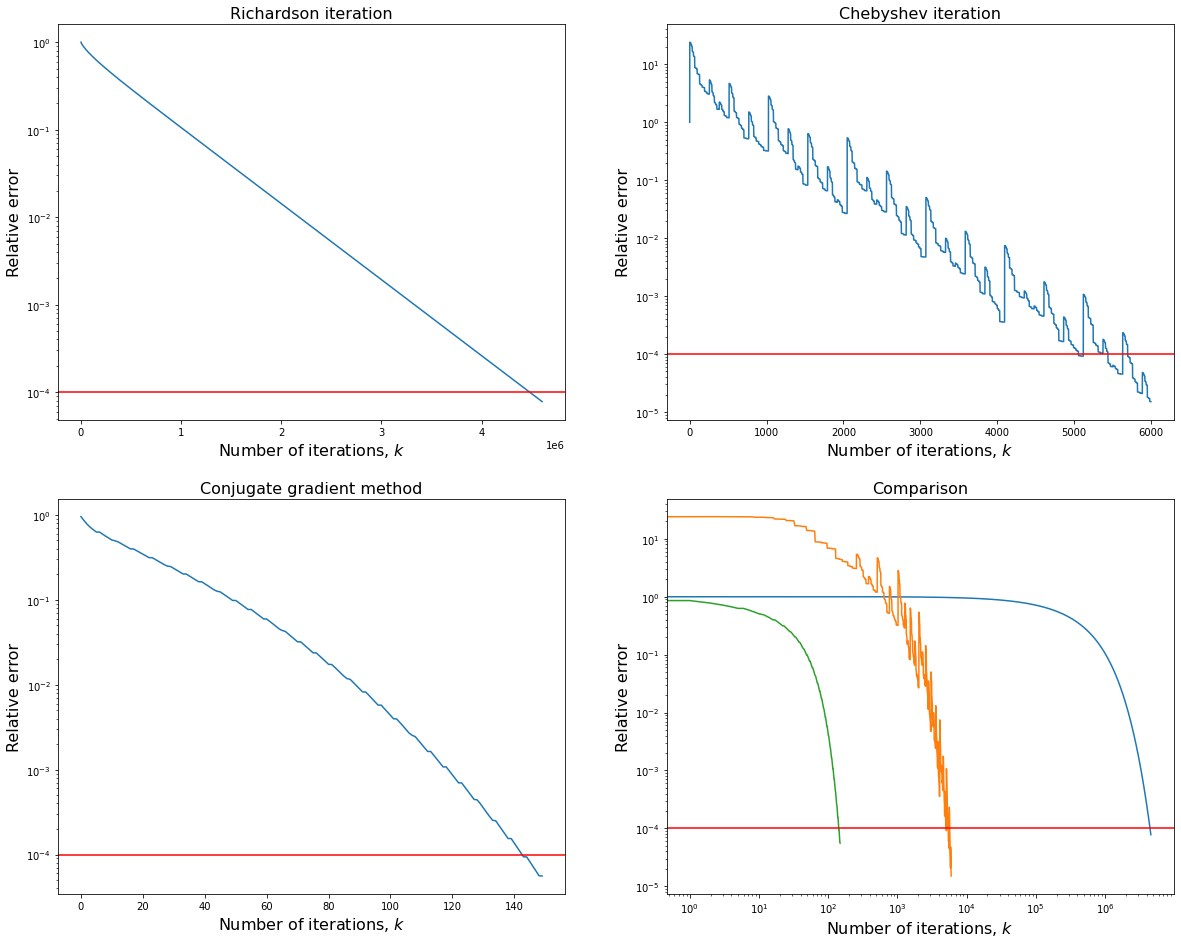

In [33]:
fig, ax = plt.subplots(figsize=(20, 16), nrows=2, ncols=2)
rel_accuracy = 1e-4

ax[0][0].semilogy(err1)
ax[0][0].set_xlabel("Number of iterations, $k$", fontsize=16)
ax[0][0].set_ylabel("Relative error", fontsize=16)
ax[0][0].set_title("Richardson iteration", fontsize=16)
ax[0][0].axhline(y=rel_accuracy, c='r') 

ax[0][1].semilogy(err2)
ax[0][1].set_xlabel("Number of iterations, $k$", fontsize=16)
ax[0][1].set_ylabel("Relative error", fontsize=16)
ax[0][1].set_title("Chebyshev iteration", fontsize=16)
ax[0][1].axhline(y=rel_accuracy, c='r') 

ax[1][0].semilogy(err3)
ax[1][0].set_xlabel("Number of iterations, $k$", fontsize=16)
ax[1][0].set_ylabel("Relative error", fontsize=16)
ax[1][0].set_title("Conjugate gradient method", fontsize=16)
ax[1][0].axhline(y=rel_accuracy, c='r') 

ax[1][1].semilogy(err1)
ax[1][1].semilogy(err2)
ax[1][1].semilogy(err3)
ax[1][1].set_xlabel("Number of iterations, $k$", fontsize=16)
ax[1][1].set_ylabel("Relative error", fontsize=16)
ax[1][1].set_title("Comparison", fontsize=16)
ax[1][1].axhline(y=rel_accuracy, c='r') 
ax[1][1].set_xscale("log")

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

Shape of x (330, 330)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
330
(330, 330)


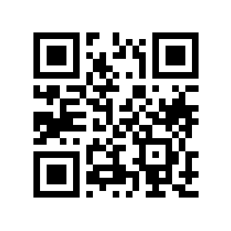

In [93]:
import matplotlib.pyplot as plt
import numpy as np

x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
print('Shape of x', x.shape)
plt.imshow(x, cmap="gray")
plt.axis("off")

print(x)
print(len(x))
print(x.shape)

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [103]:
import math
import scipy.sparse.linalg as spla

vec_x = x.reshape(n**2)

def T_matvec(alpha= 1./100,x=vec_x):
    n = int(math.sqrt(len(x)))
    x = np.reshape(x, (n,n))
    x_new = np.concatenate((x, np.zeros((n, n-1))), axis=1)
    x_new = np.concatenate((x_new, np.zeros((n-1, 2*n-1))), axis=0)
    d = np.concatenate((range(n), range(-n + 1, 0))).reshape((1, 2 * n - 1))
    t = (alpha / np.pi) * np.exp(-alpha * (d**2 + d.T**2))
    y = (np.fft.ifft2(np.fft.fft2(t)*np.fft.fft2(x_new)))[:n,:n].reshape(1,n**2)
    return y

def obtain_matrix_T(alpha, x=vec_x):
    return spla.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(alpha, x))

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [40]:
import scipy

def conjugate_gradient_solver(A, b, tol):
    k=0
    def callback(xk):
        nonlocal k
        k+=1
    solution, info = scipy.sparse.linalg.cg(A, b, tol=tol, callback=callback)
    return solution, k

alphas = [0.1,0.01,0.001]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]

iter_list1, err_list1, x_list1 = [], [], []

alpha = alphas[0]
for tol in tols:
    T = obtain_matrix_T(alpha)
    y = T.dot(vec_x)
    x, iter = conjugate_gradient_solver(T, y, tol)
    err = np.linalg.norm(vec_x - x) / np.linalg.norm(vec_x)
    iter_list1.append(iter)
    x_list1.append(x)
    err_list1.append(err)
    print(alpha, tol)

0.1 0.001
0.1 0.0001
0.1 1e-05
0.1 1e-06
0.1 1e-07



In [41]:
alphas = [0.1,0.01,0.001]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]

alpha = alphas[1]
iter_list2, err_list2, x_list2 = [], [], []
for tol in tols:
    T = obtain_matrix_T(alpha)
    y = T.dot(vec_x)
    x, iter = conjugate_gradient_solver(T, y, tol)
    err = np.linalg.norm(vec_x - x) / np.linalg.norm(vec_x)
    iter_list2.append(iter)
    x_list2.append(x)
    err_list2.append(err)
    print(alpha, tol)

0.01 0.001
0.01 0.0001
0.01 1e-05
0.01 1e-06
0.01 1e-07



In [42]:
alphas = [0.1,0.01,0.001]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]

alpha = alphas[2]
iter_list3, err_list3, x_list3 = [], [], []
for tol in tols:
    T = obtain_matrix_T(alpha)
    y = T.dot(vec_x)
    x, iter = conjugate_gradient_solver(T, y, tol)
    err = np.linalg.norm(vec_x - x) / np.linalg.norm(vec_x)
    iter_list3.append(iter)
    x_list3.append(x)
    err_list3.append(err)
    print(alpha, tol)

0.001 0.001
0.001 0.0001
0.001 1e-05
0.001 1e-06
0.001 1e-07



Text(0.5, 1.0, 'Aplha = 0.001')

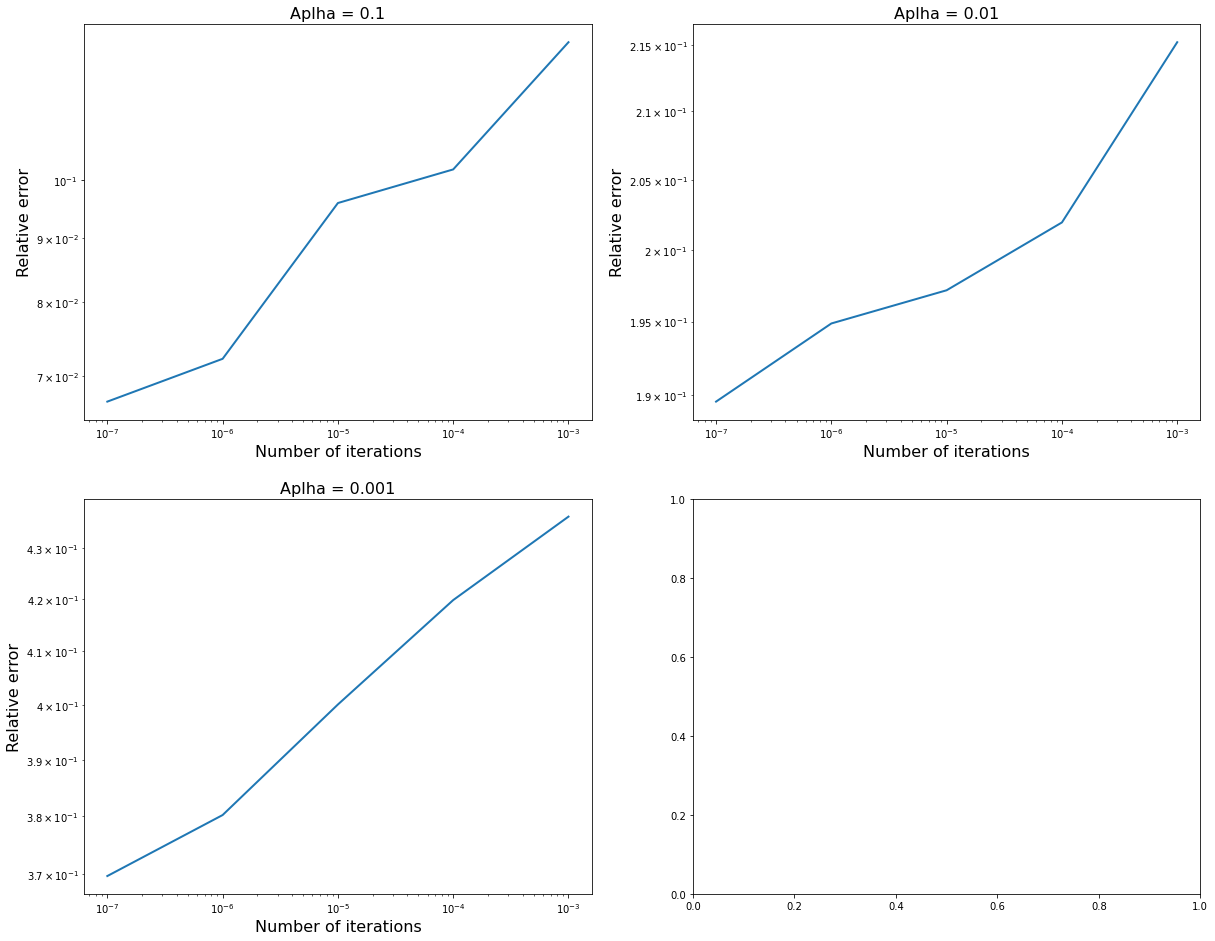

In [49]:
fig, ax = plt.subplots(figsize=(20, 16), nrows=2, ncols=2)
alphas = [0.1,0.01,0.001]
tols = [1e-3,1e-4,1e-5,1e-6,1e-7]

ax[0][0].plot(tols, err_list1,  linewidth=2,)
ax[0][0].set_xlabel("Number of iterations", fontsize=16)
ax[0][0].set_ylabel("Relative error", fontsize=16)
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_title("Aplha = 0.1", fontsize=16)

ax[0][1].plot(tols, err_list2,  linewidth=2,)
ax[0][1].set_xlabel("Number of iterations", fontsize=16)
ax[0][1].set_ylabel("Relative error", fontsize=16)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_title("Aplha = 0.01", fontsize=16)

ax[1][0].plot(tols, err_list3,  linewidth=2,)
ax[1][0].set_xlabel("Number of iterations", fontsize=16)
ax[1][0].set_ylabel("Relative error", fontsize=16)
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_title("Aplha = 0.001", fontsize=16)


The relative error does not converge to zero, you can notice by the graphs, it constantly increasing its value, we have an example of singular matrix. Conjugate gradient is unstable due to small pertubations and a degeneratuve nature of generating Krylov subspaces.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

error 158518.05712846533


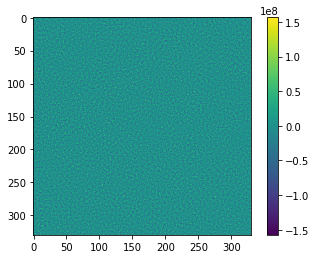

In [104]:
T = obtain_matrix_T(alpha=0.01)
y = T.dot(vec_x)

noise = np.random.normal(0,1,y.shape)
y_hat = y + noise

x, info = scipy.sparse.linalg.cg(T, y_hat, tol=1e-5, maxiter=350)
print('error', np.linalg.norm(vec_x-x_solution)/np.linalg.norm(vec_x))

plt.imshow((x.real).reshape(n,n))
plt.colorbar()

The error is really big, and specified tolerance and convergence have not been achieved and all iterations (350 in this case) were used up. By using maxiter we can put the maximum number of iterations. 

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [69]:
def T_lmbda_matvec( aplha, lmbda, x=vec_x):
    n = int(math.sqrt(len(x)))
    x = np.reshape(x, (n,n))
    x_new = np.concatenate((x, np.zeros((n, n-1))), axis=1)
    x_new = np.concatenate((x_new, np.zeros((n-1, 2*n-1))), axis=0)
    d = np.concatenate((range(n), range(-n + 1, 0))).reshape((1, 2 * n - 1))
    t = (alpha / np.pi) * np.exp(-alpha * (d**2 + d.T**2))
    t[0,0] = t[0,0] + lmbda
    y = (np.fft.ifft2(np.fft.fft2(t)*np.fft.fft2(x_new)))[:n,:n].reshape(1,n**2)
    return y

def obtain_matrix_T_lmbda(lmbda, alpha=1./100, x=vec_x):
    return spla.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(lmbda, alpha, x))

lmbdas = [10, 1, 0.1]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
x_list, iter_list, err_list = [], [], []
for lmb in lmbdas:
    for tol in tols:
        T = obtain_matrix_T_lmbda(lmbda=10)
        x, iter = conjugate_gradient_solver(T, y_hat, tol)
        err = np.linalg.norm(vec_x - x) / np.linalg.norm(vec_x)
        x_list.append(x)
        iter_list.append(iter)
        err_list.append(err)
        print(lmb, tol)
        

0.001 0.001
0.001 0.0001
0.001 1e-05
0.001 1e-06
0.001 1e-07
0.001 0.001
0.001 0.0001
0.001 1e-05
0.001 1e-06
0.001 1e-07
0.001 0.001
0.001 0.0001
0.001 1e-05
0.001 1e-06
0.001 1e-07


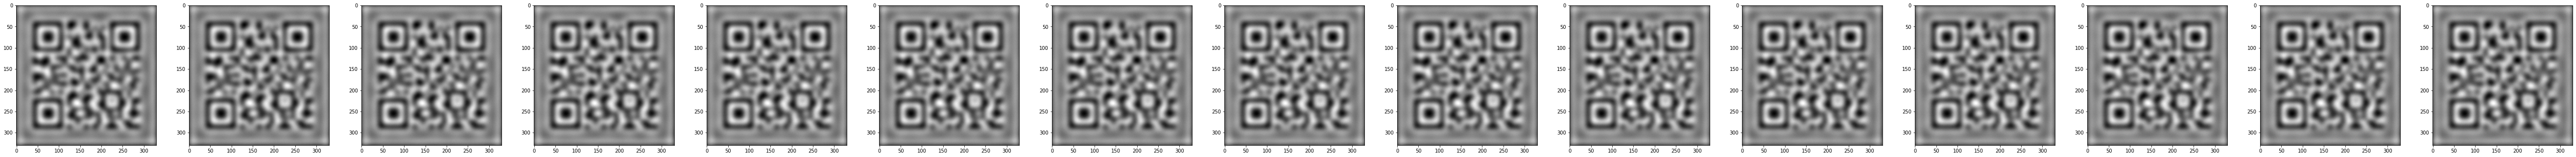

In [81]:
plt.figure(figsize=(100, 100))
for i, filter in enumerate(x_list):
    plt.subplot(16, 16, i+1)
    plt.imshow((x.real).reshape(n,n), cmap='gray')
    #plt.colorbar()
plt.show()


## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

A Toeplitz matrix is completely defined by its first column and first row (i.e. $2n - 1$, parameters)

In [108]:
T = obtain_matrix_T(alpha=0.01)
y = T.dot(vec_x)

noise = np.random.normal(0,1,y.shape)
y_hat = y + noise

def C_inv_matvec(lmbda, alpha, y=y_hat):
    n = int(math.sqrt(len(y)))
    first = np.repeat(np.arange(0, n),n)
    second = []
    for i in range(n):
      second.append(np.arange(0, n))
    second = np.concatenate(second)
    c = (alpha / np.pi) * np.exp(-alpha*(first**2 + second**2))
    c[0] = c[0] + lmbda
    x = np.fft.ifft((1/np.fft.fft(c))*np.fft.fft(y)).reshape(1,n**2)
    return x

def obtain_matrix_C(lmbda,alpha, y=y_hat):
    return spla.LinearOperator((n**2, n**2), matvec = lambda y : C_inv_matvec(lmbda, alpha, y))

In [109]:
import time
start = time.time()
alpha = 0.01
lmbda = 1
C = obtain_matrix_C(lmbda=lmbda, alpha=alpha)
finish = time.time()
print(finish-start)

0.02031111717224121


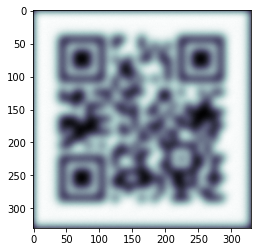

In [113]:
plt.imshow((C.dot(y_hat).real).reshape(n,n), cmap='bone')